# What is an Image?

An image is a two-dimensional array of pixel values where each pixel represents the color information at a specific point. Images can be grayscale (where each pixel is a shade of gray) or color images, where each pixel is represented by three or four values corresponding to the primary color channels (e.g., RGB).

- Digital Image: Stored as a matrix of pixel values.
- Color Image: Each pixel is represented by a tuple (e.g., (255, 0, 0) for red in RGB).

In [9]:
from PIL import Image

# Understanding R, G, B Visually

Run RGB_visualize.py to visualize channels

# Color Models

A color model is a mathematical model that describes the way colors can be represented as a set of numbers.

1. RGB (Red, Green, Blue)
- An additive color model, where colors are formed by adding red, green, and blue light in varying intensities.
- Each pixel is represented by three values: red, green, and blue, ranging from 0 to 255.
2. CMYK (Cyan, Magenta, Yellow, Black)
- A subtractive color model, commonly used in printing.
- Colors are created by subtracting colors from white light using cyan, magenta, yellow, and black inks.
3. HSV (Hue, Saturation, Value)
- A color model that represents color in terms of hue, saturation, and value.
- Hue: The color tone
- Saturation: The purity of the color
- Value: The brightness or intensity of the color.
4. HSL (Hue, Saturation, Lightness)
- Similar to HSV, but uses lightness instead of value.
- Lightness represents the overall brightness of the color.
5. YIQ
- A color model used in analog color television systems
- It separates the luminance (Y)(brightness or intensity of a color) component from the chrominance (I and Q)(hue and saturation of a color) components.

## Creating RGB image with PIL

In [10]:
# Create image with orange color
image = Image.new("RGB", (100, 100), (255, 100, 0))

In [11]:
print(image)

<PIL.Image.Image image mode=RGB size=100x100 at 0x15E782710>


In [12]:
print(type(image))

print(image.size)

print(image.mode)

print(len(image.getbands()))

<class 'PIL.Image.Image'>
(100, 100)
RGB
3


In [13]:
image.show()

## Creating B/W or gray-scale image with PIL

In [14]:
# Create image with orange color
image_bw = Image.new("L", (100, 100), (100))


In [15]:
print(type(image_bw))

print(image_bw.size)

print(image_bw.mode)

print(image_bw.getbands())

<class 'PIL.Image.Image'>
(100, 100)
L
('L',)


In [16]:
image_bw.show()

## Creating RGB image with Numpy and OpenCV

In [17]:
import numpy as np
import cv2

In [18]:
# Create a blank image with black pixels
image_opencv = np.zeros((500, 500, 3), np.uint8)

In [19]:
# Fill the image with orange color (BGR values)
image_opencv[:] = (0, 100, 255)

In [20]:
print(image_opencv.shape)

print(len(image_opencv))

(500, 500, 3)
500


In [ ]:
# Display the image
cv2.imshow('Orange Image', image_opencv)
cv2.waitKey(0)
cv2.destroyAllWindows()

2024-11-17 00:45:43.729 Python[74596:592175] +[IMKClient subclass]: chose IMKClient_Modern
2024-11-17 00:45:43.729 Python[74596:592175] +[IMKInputSession subclass]: chose IMKInputSession_Modern


# Creating BW image with Numpy and OpenCV

In [21]:
image_opencv_bw = np.zeros((500, 500, 1), np.uint8) 
image_opencv_bw[:] = (100)

In [22]:
print(image_opencv_bw.shape)

(500, 500, 1)


In [ ]:
# Display the image
cv2.imshow('grey_scale Image', image_opencv_bw)
cv2.waitKey(0)
cv2.destroyAllWindows()

2024-11-17 00:47:55.277 Python[75886:596909] +[IMKClient subclass]: chose IMKClient_Modern
2024-11-17 00:47:55.277 Python[75886:596909] +[IMKInputSession subclass]: chose IMKInputSession_Modern


## Creating RGBA Image PIL

- RGB: Red, Green, and Blue channels, with each pixel representing a combination of these three colors.

- RGBA: Adds an Alpha channel to RGB, representing transparency.

- Grayscale: A single channel representing shades of gray.

- CMYK: Used in printing (Cyan, Magenta, Yellow, Black).

In [6]:
# Create image with orange color
image = Image.new("RGB", (100, 100), (255, 100, 0))
image_rgba = image.convert("RGBA")

print(image_rgba.size)

print(image_rgba.mode)

print(image_rgba.getbands())

image_rgba.show()

(100, 100)
RGBA
('R', 'G', 'B', 'A')


## Convert to RGB from BGR Image OpenCV

In [ ]:
# Convert BGR to RGB
image_rgb = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2RGB)

# Display the image
cv2.imshow('BGR to RGB', image_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

2024-11-17 00:58:21.122 Python[79044:607493] +[IMKClient subclass]: chose IMKClient_Modern
2024-11-17 00:58:21.122 Python[79044:607493] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [ ]:
# Convert BGR to RGB
image_bw = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2GRAY)

# Display the image
cv2.imshow('BGR to GreyScale', image_bw)
cv2.waitKey(0)
cv2.destroyAllWindows()

## OpenCV doesn't directly support adding an alpha channel to an image, you can achieve this by creating a new image with 4 channels (BGRA) and copying the original image data into it

In [ ]:
# Create a new image with 4 channels (BGRA)
bgra_opencv = np.zeros((image_rgb.shape[0], image_rgb.shape[1], 4), dtype=np.uint8)

In [ ]:
# Copy the original image data into the BGR channels
bgra_opencv[:, :, :3] = image_rgb

In [22]:
# Set the alpha channel to 255 (fully opaque)
bgra_opencv[:, :, 3] = 255

In [23]:
print(bgra_opencv.shape)

print(len(bgra_opencv))

(500, 500, 4)
500


In [24]:
# Display the image
cv2.imshow('BGR to BGRA', bgra_opencv)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image Types

| Abbreviation | Description | File extensions |
| ------------- | ------------- | ------------- |
| JPEG  | Joint Photographic Expert Group image.Good choice for lossy compression of still images   | .jpg, .jpeg, .jfif, .pjpeg, .pjp    |
| PNG  | Portable Network Graphics. Lossless compression, supports transparency (RGBA). PNG is preferred over JPEG for more precise reproduction of source images, or when transparency is needed.   | .png    |
| HEIC  | New format, efficient compression with higher quality (used by iPhones).   | .heic    |
| GIF  | Graphics Interchange Format. Good choice for simple images and animations.   | .gif    |
| TIFF  | Tagged Image File Format. Brain MRI images on kaggle.   | .tif, .tiff    |

In [26]:
import os

def print_file_size(file):

    File_Size = os.path.getsize(file) # returns bytes
    File_Size_KB = round(File_Size/1024,4)

    print("Image File Size is " + str(File_Size_KB) + "KB" )

## Save an PIL image in different formats

In [24]:
image.save("./temp/image_SAVE_95.jpg", quality=95)  # JPG with high quality
print_file_size("./temp/image_SAVE_95.jpg")

image.save("./temp/image_SAVE_50.jpg", quality=50)  # JPG with high quality
print_file_size("./temp/image_SAVE_50.jpg")

image.save("./temp/image_SAVE.png")  # PNG with lossless compression
print_file_size("./temp/image_SAVE.png")

Image File Size is 0.8066KB
Image File Size is 0.8047KB
Image File Size is 0.2832KB


## Save an OpenCV image in different formats

In [25]:
cv2.imwrite("./temp/imagecv_SAVE_100.jpg", image_rgb, [cv2.IMWRITE_JPEG_QUALITY, 100]) # By default is 95
# The value can be between 0 to 100, where 100 produces the highest quality and 0 produces the lowest quality.
print_file_size("./temp/imagecv_SAVE_100.jpg")

cv2.imwrite("./temp/imagecv_SAVE_50.jpg", image_rgb, [cv2.IMWRITE_JPEG_QUALITY, 50])
print_file_size("./temp/imagecv_SAVE_50.jpg")

cv2.imwrite("./temp/imagecv_SAVE_0.jpg", image_rgb, [cv2.IMWRITE_JPEG_QUALITY, 0])
print_file_size("./temp/imagecv_SAVE_0.jpg")

cv2.imwrite("./temp/imagecv_SAVE.png", image_rgb) # bydefault, compression is set to 3
print_file_size("./temp/imagecv_SAVE.png")

cv2.imwrite("./temp/imagecv_SAVE_0.png", image_rgb, [int(cv2.IMWRITE_PNG_COMPRESSION),0]) # bydefault, compression is set to 3
print_file_size("./temp/imagecv_SAVE_0.png")

cv2.imwrite("./temp/imagecv_SAVE_9.png", image_rgb, [int(cv2.IMWRITE_PNG_COMPRESSION),9])
# The value can be between 0 to 9, where 9 produces the highest compression with more time to save images into the file.
print_file_size("./temp/imagecv_SAVE_9.png")

Image File Size is 4.6162KB
Image File Size is 4.6133KB
Image File Size is 4.6113KB
Image File Size is 2.3369KB
Image File Size is 734.1504KB
Image File Size is 1.4072KB


In [31]:
a_img = cv2.imread("./temp/imagecv_SAVE_50.jpg")

In [33]:
a_img.shape

(500, 500, 3)

## EXIF Details

Metadata in images, like camera settings, date, etc.

In [34]:
from PIL import Image, ExifTags

In [37]:
Image = Image.open('./data/beach-blue.jpg')
#image = Image.open('./data/GP_PXL_20240926_003004774.jpg')
exif_data = image._getexif()

In [38]:
# Pillow doesn't provide a built-in way to directly modify EXIF data.

for tag, value in exif_data.items():
    tag_name = ExifTags.TAGS.get(tag, tag)
    print(f"{tag_name}: {value}")

ImageWidth: 2268
ImageLength: 4032
GPSInfo: {16: 'M', 17: 268.0}
ResolutionUnit: 2
ExifOffset: 244
Make: Google
Model: Pixel 4a
Software: HDR+ 1.0.540104767zdr
Orientation: 1
DateTime: 2024:09:26 06:00:04
YCbCrPositioning: 1
XResolution: 72.0
YResolution: 72.0
ExifVersion: b'0232'
ComponentsConfiguration: b'\x01\x02\x03\x00'
ShutterSpeedValue: 6.64
DateTimeOriginal: 2024:09:26 06:00:04
DateTimeDigitized: 2024:09:26 06:00:04
ApertureValue: 1.58
BrightnessValue: 2.35
ExposureBiasValue: 0.0
MaxApertureValue: 1.58
SubjectDistance: 4294967295.0
MeteringMode: 2
Flash: 16
FocalLength: 4.38
ColorSpace: 1
ExifImageWidth: 2268
SceneCaptureType: 0
OffsetTime: +05:30
OffsetTimeOriginal: +05:30
OffsetTimeDigitized: +05:30
SubsecTime: 774
SubsecTimeOriginal: 774
SubsecTimeDigitized: 774
ExifImageHeight: 4032
SensingMethod: 2
ExposureTime: 0.010013
ExifInteroperabilityOffset: 949
FNumber: 1.73
SceneType: b'\x01'
ExposureProgram: 2
CustomRendered: 1
ISOSpeedRatings: 183
ExposureMode: 0
FlashPixVersion

The 8 EXIF orientation values are numbered 1 to 8.

- 1 = 0 degrees: the correct orientation, no adjustment is required.
- 2 = 0 degrees, mirrored: image has been flipped back-to-front.
- 3 = 180 degrees: image is upside down.
- 4 = 180 degrees, mirrored: image has been flipped back-to-front and is upside down.
- 5 = 90 degrees: image has been flipped back-to-front and is on its side.
- 6 = 90 degrees, mirrored: image is on its side.
- 7 = 270 degrees: image has been flipped back-to-front and is on its far side.
- 8 = 270 degrees, mirrored: image is on its far side.

In [40]:
pip install piexif


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [41]:
# Print EXIF tags and values
import piexif

exif_dict = piexif.load(image.info.get('exif', b''))
print(exif_dict)

# Update orientation to 5 (Mirrored and rotated 90° counterclockwise)
# Tag 274 refers to the 'Orientation' tag in EXIF
exif_dict["0th"][piexif.ImageIFD.Orientation] = 5

# Insert the modified EXIF data back into the image
exif_bytes = piexif.dump(exif_dict)
image.save('./temp/GP_PXL_20240926_003004774_with_updated_exif.jpg', exif=exif_bytes)

{'0th': {256: 2268, 257: 4032, 271: b'Google', 272: b'Pixel 4a', 274: 1, 282: (72, 1), 283: (72, 1), 296: 2, 305: b'HDR+ 1.0.540104767zdr', 306: b'2024:09:26 06:00:04', 531: 1, 34665: 244, 34853: 979}, 'Exif': {33434: (10013, 1000000), 33437: (173, 100), 34850: 2, 34855: 183, 36864: b'0232', 36867: b'2024:09:26 06:00:04', 36868: b'2024:09:26 06:00:04', 36880: b'+05:30', 36881: b'+05:30', 36882: b'+05:30', 37121: b'\x01\x02\x03\x00', 37377: (664, 100), 37378: (158, 100), 37379: (235, 100), 37380: (0, 6), 37381: (158, 100), 37382: (4294967295, 1), 37383: 2, 37385: 16, 37386: (4380, 1000), 37520: b'774', 37521: b'774', 37522: b'774', 40960: b'0100', 40961: 1, 40962: 2268, 40963: 4032, 40965: 949, 41495: 2, 41729: b'\x01', 41985: 1, 41986: 0, 41987: 0, 41988: (0, 1), 41989: 27, 41990: 0, 41992: 0, 41993: 0, 41994: 0, 41996: 3, 42035: b'Google', 42036: b'Pixel 4a back camera 4.38mm f/1.73'}, 'GPS': {16: b'M', 17: (268, 1)}, 'Interop': {1: b'R98'}, '1st': {256: 283, 257: 504, 259: 6, 274: 1,

# Image Loading

In [45]:
import cv2
from PIL import Image

# Load using OpenCV
# OpenCV loads images in BGR
image_cv = cv2.imread('./data/beach-blue.jpg')
image_swapped = cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY)
image_swapped = image_cv[:, :, ::-1] # BGR to RGB

# Load using Pillow
# pillow loads images in RGB
image_pil = Image.open('./data/beach-blue.jpg')

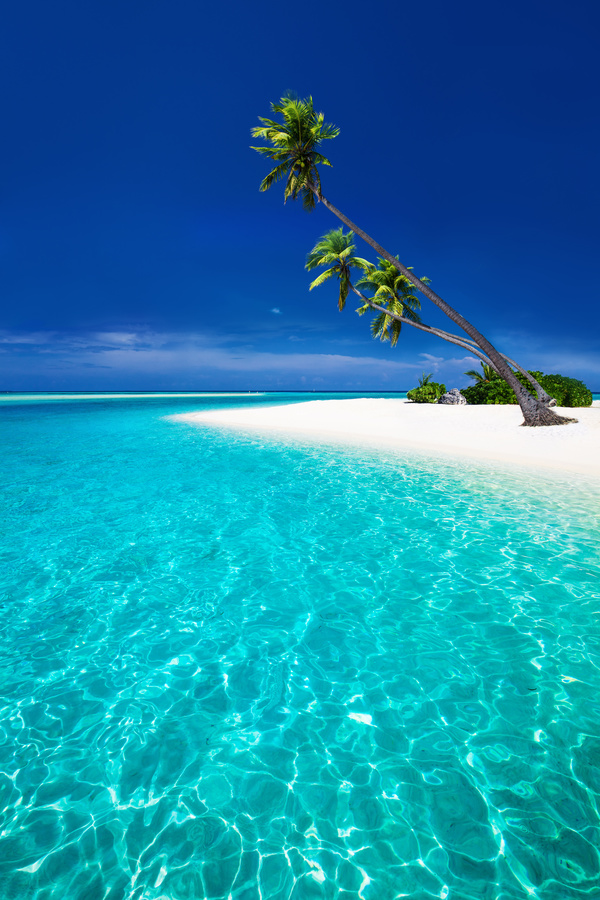

In [46]:
image_pil

In [47]:
image_swapped

array([[[  3,  55, 138],
        [  3,  55, 138],
        [  3,  55, 138],
        ...,
        [  3,  42, 117],
        [  3,  42, 117],
        [  3,  42, 117]],

       [[  3,  55, 138],
        [  3,  55, 138],
        [  3,  55, 138],
        ...,
        [  3,  42, 117],
        [  3,  42, 117],
        [  3,  42, 117]],

       [[  3,  55, 138],
        [  3,  55, 138],
        [  3,  55, 138],
        ...,
        [  3,  42, 117],
        [  3,  42, 117],
        [  3,  42, 117]],

       ...,

       [[  4, 156, 157],
        [  0, 158, 161],
        [  0, 176, 174],
        ...,
        [  1, 121, 119],
        [  0, 123, 121],
        [  1, 127, 124]],

       [[  5, 168, 165],
        [  2, 166, 167],
        [  4, 183, 180],
        ...,
        [  2, 127, 131],
        [  0, 129, 131],
        [  0, 133, 132]],

       [[  0, 161, 157],
        [  0, 163, 161],
        [  0, 174, 172],
        ...,
        [  2, 126, 134],
        [  0, 126, 132],
        [  0, 129, 134]]